# INFO 3401 – Class 25: Choropleths and basemaps

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT).

## Learning Objectives
This lecture will reinforce our previous example of joining a pandas DataFrame with a GeoPandas GeoDataFrame and visualizing the result and making choropleth visualizations of spatial data.

* Making choropleths using international and local spatial data
* Working with geoplot

## Background

This module will explore how to acquire, analyze, and visualize spatial data. I have adapted this content from the excellent course [Auotmating GIS processes](https://automating-gis-processes.github.io/site/index.html) course by [Vuokko Heikinheimo](https://researchportal.helsinki.fi/en/persons/vuokko-vilhelmiina-heikinheimo) and [Henrikki Tenkanen](https://www.ucl.ac.uk/geospatial-analytics/people/henrikki-tenkanen).

## Load libraries

Load our usual libraries.

In [1]:
# Data processing libraries
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100

# Visualization libraries
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

# Geospatial libraries
import geopandas as gpd
from pyproj import CRS

## Load data

Load the countries spatial data we used in Class 23.

In [2]:
countries_geojson_gdf = gpd.read_file('https://github.com/datasets/geo-countries/raw/master/data/countries.geojson',driver='GeoJSON')

countries_geojson_gdf.head()

,ADMIN,ISO_A3,ISO_A2,geometry
0,Aruba,ABW,AW,"MULTIPOLYGON (((-69.99694 12.57758, -69.93639 ..."
1,Afghanistan,AFG,AF,"MULTIPOLYGON (((71.04980 38.40866, 71.05714 38..."
2,Angola,AGO,AO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,AI,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,AL,"MULTIPOLYGON (((19.74777 42.57890, 19.74601 42..."


In [8]:
type(countries_geojson_gdf)

geopandas.geodataframe.GeoDataFrame

Check our DataFrame shape.

In [4]:
countries_geojson_gdf.shape

(255, 4)

Check our CRS.

In [6]:
countries_geojson_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Load [UN data](https://data.un.org/) about Internet usage.

In [7]:
internet_df = pd.read_csv('https://data.un.org/_Docs/SYB/CSV/SYB62_314_201904_Internet%20Usage.csv',
                          encoding='latin1',
                          header=[1])

internet_pivot_df = pd.pivot_table(internet_df,index='Unnamed: 1',columns='Year',values='Value')

internet_pivot_df.index.name = 'Country'

internet_pivot_df.head()


Year,2000,2005,2010,2014,2015,2016,2017
Country,,,,,,,
Afghanistan,NaN,1.2,4.0,7.0,8.3,10.6,11.4
Albania,0.1,6.0,45.0,60.1,63.3,66.4,71.8
Algeria,0.5,5.8,12.5,29.5,38.2,42.9,47.7
Andorra,10.5,37.6,81.0,95.9,96.9,97.9,98.9
Angola,0.1,1.1,2.8,10.2,12.4,13.0,14.3


Are the country names the same in both DataFrames?

In [9]:
countries_geojson_gdf['ADMIN']

0             Aruba
1       Afghanistan
2            Angola
3          Anguilla
4           Albania
           ...     
250           Samoa
251           Yemen
252    South Africa
253          Zambia
254        Zimbabwe
Name: ADMIN, Length: 255, dtype: object

In [12]:
set(countries_geojson_gdf['ADMIN'].unique()) - set(internet_pivot_df.index)
# what is in the set of countries_geojson_gdf['ADMIN'] but not in internet_pivot_df

{'Akrotiri Sovereign Base Area',
 'Aland',
 'American Samoa',
 'Antarctica',
 'Ashmore and Cartier Islands',
 'Bajo Nuevo Bank (Petrel Is.)',
 'Baykonur Cosmodrome',
 'Bolivia',
 'British Indian Ocean Territory',
 'Brunei',
 'Cape Verde',
 'Clipperton Island',
 'Coral Sea Islands',
 'Cyprus No Mans Area',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Dhekelia Sovereign Base Area',
 'East Timor',
 'Falkland Islands',
 'Federated States of Micronesia',
 'French Southern and Antarctic Lands',
 'Guinea Bissau',
 'Heard Island and McDonald Islands',
 'Hong Kong S.A.R.',
 'Indian Ocean Territories',
 'Iran',
 'Isle of Man',
 'Ivory Coast',
 'Kosovo',
 'Laos',
 'Macao S.A.R',
 'Macedonia',
 'Moldova',
 'Norfolk Island',
 'North Korea',
 'Northern Cyprus',
 'Northern Mariana Islands',
 'Palestine',
 'Pitcairn Islands',
 'Republic of Congo',
 'Republic of Serbia',
 'Russia',
 'Saint Barthelemy',
 'Saint Martin',
 'Saint Pierre and Miquelon',
 'Saint Vincent and the Grenadines',
 'Sc

In [15]:
set(internet_pivot_df.index) - set(countries_geojson_gdf['ADMIN'].unique())

{'Ascension',
 'Asia',
 'Australia and New Zealand',
 'Bahamas',
 'Bolivia (Plurin. State of)',
 'Brunei Darussalam',
 'Cabo Verde',
 'Caribbean',
 'Central Asia',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'Congo',
 'Czechia',
 'Côte d\x92Ivoire',
 "Dem. People's Rep. Korea",
 'Dem. Rep. of the Congo',
 'Eastern Africa',
 'Eastern Asia',
 'Eswatini',
 'Europe',
 'Falkland Islands (Malvinas)',
 'Guinea-Bissau',
 'Iran (Islamic Republic of)',
 "Lao People's Dem. Rep.",
 'Latin America',
 'Latin America & the Caribbean',
 'Mayotte',
 'Micronesia (Fed. States of)',
 'Middle Africa',
 'Netherlands Antilles [former]',
 'North Macedonia',
 'Northern Africa',
 'Northern America',
 'Oceania',
 'Other non-specified areas',
 'Republic of Korea',
 'Republic of Moldova',
 'Russian Federation',
 'Réunion',
 'Saint Vincent & Grenadines',
 'Serbia',
 'South-central Asia',
 'South-eastern Asia',
 'Southern Africa',
 'Southern Asia',
 'State of Palestine',
 'Sub-Saharan Africa',
 'Syrian Arab Repub

Try to fix some of the names in `internet_pivot_df`.

In [16]:
country_rename_d = {'Bolivia (Plurin. State of)':'Bolivia',
                    'Brunei Darussalam':'Brunei',
                    'Cabo Verde':'Cape Verde',
                    'China, Hong Kong SAR':'Hong Kong S.A.R.',
                    'China, Macao SAR':'Macao S.A.R.',
                    'Congo':'Republic of Congo',
                    'Czechia':'Czech Republic',
                    'Dem. Rep. of the Congo':'Democratic Republic of the Congo',
                    'Côte d\x92Ivoire':'Ivory Coast',
                    "Dem. People's Rep. Korea":'North Korea',
                    'Guinea-Bissau':'Guinea Bissau',
                    'Iran (Islamic Republic of)':'Iran',
                    "Lao People's Dem. Rep.":'Laos',
                    'Republic of Korea':'South Korea',
                    'Republic of Moldova':'Moldova',
                    'Russian Federation':'Russia',
                    'State of Palestine':'Palestine',
                    'Serbia':'Republic of Serbia',
                    'Syrian Arab Republic':'Syria',
                    'Venezuela (Boliv. Rep. of)':'Venezuela',
                    'United Rep. of Tanzania':'United Republic of Tanzania',
                    'Viet Nam':'Vietnam'
                   }

In [17]:
internet_pivot_df.rename(index = country_rename_d, inplace=True)

Join the "ADMIN" column from `countries_geojson_gpd` with the index from `internet_pivot_df`.

In [18]:
internet_country_df = pd.merge(left= countries_geojson_gdf, 
                               right = internet_pivot_df, 
                               how = 'left', # preserve every thing in countries_geojson_gdf
                               left_on = 'ADMIN',
                               right_index = True, 
                              )
internet_country_df.head()

,ADMIN,ISO_A3,ISO_A2,geometry,2000,2005,2010,2014,2015,2016,2017
0,Aruba,ABW,AW,"MULTIPOLYGON (((-69.99694 12.57758, -69.93639 ...",15.4,25.4,62.0,83.8,88.7,93.5,97.2
1,Afghanistan,AFG,AF,"MULTIPOLYGON (((71.04980 38.40866, 71.05714 38...",NaN,1.2,4.0,7.0,8.3,10.6,11.4
2,Angola,AGO,AO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",0.1,1.1,2.8,10.2,12.4,13.0,14.3
3,Anguilla,AIA,AI,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ...",22.4,29.0,49.6,70.4,76.0,81.6,81.6
4,Albania,ALB,AL,"MULTIPOLYGON (((19.74777 42.57890, 19.74601 42...",0.1,6.0,45.0,60.1,63.3,66.4,71.8


Check the type after merging. Is this a pandas DataFrame or a GeoPandas GeoDataFrame?

In [23]:
type(internet_country_df), type(internet_pivot_df), type(countries_geojson_gdf)#geometery column is the key feature for a data  frame to be a GeoDataFrame

(geopandas.geodataframe.GeoDataFrame,
 pandas.core.frame.DataFrame,
 geopandas.geodataframe.GeoDataFrame)

Check the shapes of the merged GeoDataFrame compared to the shapes before.

In [24]:
internet_country_df.shape, internet_pivot_df.shape, countries_geojson_gdf.shape

((255, 11), (245, 7), (255, 4))

## Experiment with visualizations
Use the `.plot` method on the `internet_country_df` GeoDataFrame.

In [26]:
internet_country_df.head(2)

,ADMIN,ISO_A3,ISO_A2,geometry,2000,2005,2010,2014,2015,2016,2017
0,Aruba,ABW,AW,"MULTIPOLYGON (((-69.99694 12.57758, -69.93639 ...",15.4,25.4,62.0,83.8,88.7,93.5,97.2
1,Afghanistan,AFG,AF,"MULTIPOLYGON (((71.04980 38.40866, 71.05714 38...",NaN,1.2,4.0,7.0,8.3,10.6,11.4


<AxesSubplot:>

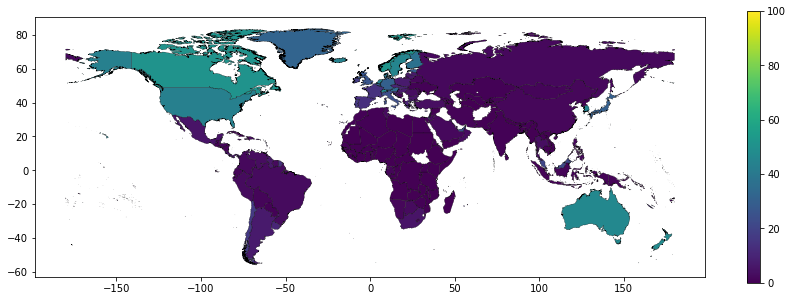

In [36]:
f,ax = plt.subplots(figsize=(15,10))

internet_country_df.plot(column = 2000, # year 2000  data
                         legend = True, # add legend reference bar at right
                         legend_kwds = {'shrink': .5},
                         vmin = 0, # min for legend
                         vmax = 100, # max for legend
                         edgecolor='k', # add edge line color
                         lw = .25, # thgickness of the borderline
                         ax=ax) # ax mapping

Change to a different year.

<AxesSubplot:>

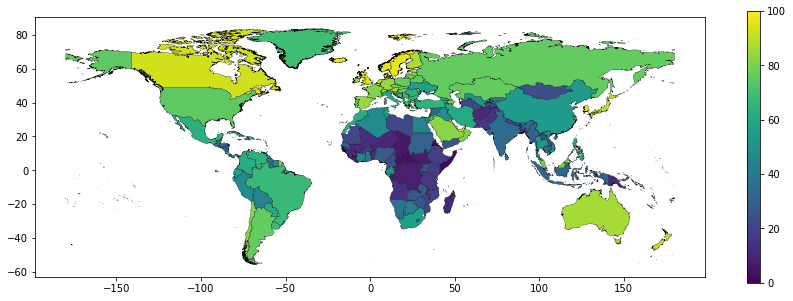

In [37]:
f,ax = plt.subplots(figsize=(15,10))

internet_country_df.plot(column = 2017, # year 2000  data
                         legend = True, # add legend reference bar at right
                         legend_kwds = {'shrink': .5},
                         vmin = 0, # min for legend
                         vmax = 100, # max for legend
                         edgecolor='k', # add edge line color
                         lw = .25, # thgickness of the borderline
                         ax=ax) # ax mapping

Change to a different projection.

<AxesSubplot:>

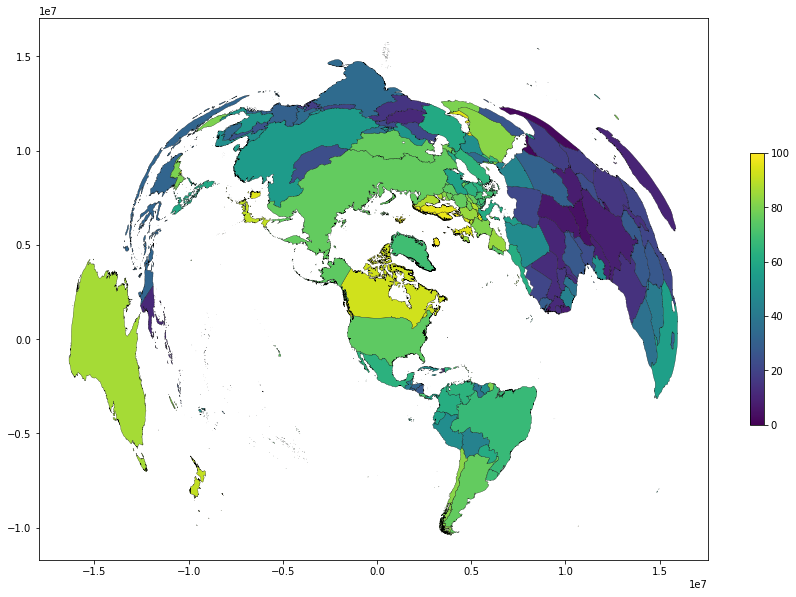

In [41]:
aeqd = CRS(proj='aeqd',ellps='WGS84',datum='WGS84',lat_0=38.99853,lon_0=-105.54782).srs

f,ax = plt.subplots(figsize=(15,10))

internet_country_df.to_crs(crs=aeqd).plot(column = 2017, # year 2000  data
                         legend = True, # add legend reference bar at right
                         legend_kwds = {'shrink': .5},
                         vmin = 0, # min for legend
                         vmax = 100, # max for legend
                         edgecolor='k', # add edge line color
                         lw = .25, # thgickness of the borderline
                         ax=ax)

Download another dataset from the UN, clean up the country names, and visualize.

In [43]:
boco_precinct_gdf = gpd.read_file('boco_precincts/boco_precincts/Precincts.shp', dtype={'PRECINCT':str})
boco_precinct_gdf.head()

,OBJECTID,DISTRICT,PRECINCT,ABBREVIATI,EDIT_STAT,NOTES,SHAPEarea,SHAPElen,geometry
0,1,2181107506,2181107506,506,None,None,2.126887e+07,20223.228724,"POLYGON ((-105.15055 40.08733, -105.15056 40.0..."
1,2,2181107702,2181107702,702,None,None,1.186144e+08,61359.675227,"POLYGON ((-105.14988 40.13407, -105.14963 40.1..."
2,3,2181107505,2181107505,505,None,None,2.398745e+07,22560.123010,"POLYGON ((-105.16275 40.10161, -105.16275 40.1..."
3,4,2181107701,2181107701,701,None,None,1.728000e+08,73356.477307,"POLYGON ((-105.18323 40.12389, -105.18323 40.1..."
4,5,2181107705,2181107705,705,None,None,4.708790e+08,132293.031420,"POLYGON ((-105.15906 40.26122, -105.15905 40.2..."


## Boulder County precincts

Download the Boulder County precinct shapefile: https://opendata-bouldercounty.hub.arcgis.com/datasets/precincts

Download the 2016 "General Election precinct-level results in Excel" from the CO Secretary of State: https://www.sos.state.co.us/pubs/elections/Results/archive2000.html

Load the precincts (note I have change the directory to "boco_precincts").

Check the CRS.

Load the CO 2016 precinct-level results.

Check to make sure there's some overlap.

Filter `co2016_results_df` to just "President/Vice President" for the Democratic and Republican parties in Boulder County.

Reshape and feature engineer.

Merge both.

Plot the results.

## Denver County precinct
Download, unzip, and load the [Denver County election precinct shapefile](https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-election-precincts). Note the folder name of where the Denver data lives.

Make sure there's stuff in the overlap.

Merge both.

Plot the results.

## County-level results
Do it by county.

Read in the [county shapefile](https://data.colorado.gov/Transportation/Counties-in-Colorado/67vn-ijga) from data.colorado.gov and merge both. Note: this directory and filename are likely different from what you downloaded. Rename in your file explorer.

Merge both.

Plot the results.

## Using geoplot

These maps are missing a lot of important context. [Geoplot](https://residentmario.github.io/geoplot/index.html) is a visualization libary that can ingest GeoDataFrames but also include map tiles from OpenStreetMap and other open geo data sources. Basically, we can overlay the precinct data with the map of the region.

In [ ]:
import geoplot
import geoplot.crs as gcrs

# https://github.com/darribas/contextily
import contextily

# For help with the legend
import matplotlib.colors as colors

Use the `webmap` method with:

* the GeoDataFrame (to get the map extents)
* a provider (alternatives available from [`contextily`](https://github.com/darribas/contextily))
* and the WebMercator() projection

On this last point, you may need to cast your orignal data in another CRS to EPSG 3785/3857/4326.

Plot the `boco_precinct_results` with a well-normalized legend.

Plot the `denco_precinct_results` with a well-normalized legend.

Plot the `county_2016_results_gdf` with a well-normalized legend.